In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as ss
from osgeo import gdal
from lib import temp_lib
from scipy import fftpack
import numpy.linalg as npl


In [2]:
Tifpath = 'StageGMM4_2020_SA4CD/Data/Paracou_125MHz/geo5Md3iHV_t4-7_NCI7_lkLcl3-5-t7_lkRgn9-15.tif'
Tifpath1 = 'StageGMM4_2020_SA4CD/Data/Paracou_125MHz/geo5Md3N0-iHV_t1_NCI7_lkLcl3-5-t7_lkRgn9-15.tif'
gdal.UseExceptions()

ds_normal = gdal.Open(Tifpath1)
ds = gdal.Open(Tifpath)
ds_normal1 = np.array(ds_normal.GetRasterBand(1).ReadAsArray())
ds_band1 = np.array(ds.GetRasterBand(1).ReadAsArray())
ds_band3 = np.array(ds.GetRasterBand(3).ReadAsArray())


ds_normal11 = ds_normal1[10:-10, 20:-50]
ds_norm1 = ds_band1[10: -10, 20:-50]/ds_normal11
ds_norm3 = ds_band3[10: -10, 20:-50]/ds_normal11

In [3]:
im1 = temp_lib(ds_band1)
im3 = temp_lib(ds_band3)
im_norm1 = temp_lib(ds_norm1)
im_norm3 = temp_lib(ds_norm3)

## Original and normalized images of Paracou

/home/wilhelm/INSA/4A/S2/CESBIO/lib.py:75: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(self._x, self._y, np.log10(self._image)*10, vmin = -40, vmax = 0)


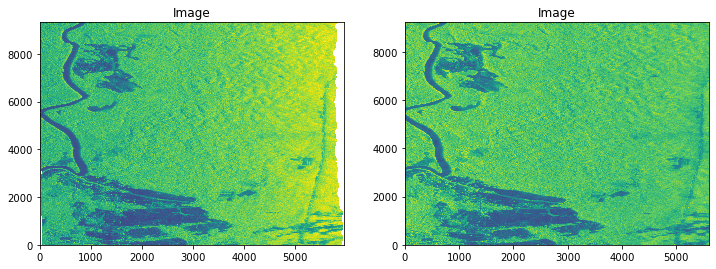

In [4]:
im1.plot_image(im_norm1)

### Extracting a band for analysis

In [5]:
help(im1.extract_band)
help(im1.plot_TF)

Help on method extract_band in module lib:

extract_band(interval=None) method of lib.temp_lib instance
    Extracts a band from the image.
    If interval is a tuple, the element-wise average is calculated
    By default the interval is [712, 718]

Help on method plot_TF in module lib:

plot_TF(other=None) method of lib.temp_lib instance
    Plots the fourier transform of ds_band and ds_band itself



#### The deforestation happens around 5000km on the x-axis and 4000km on the y-axis. 

/home/wilhelm/INSA/4A/S2/CESBIO/lib.py:93: RuntimeWarning: divide by zero encountered in log10
  plt.plot(self._x, np.log10(self._ds_band)*10)
/home/wilhelm/INSA/4A/S2/CESBIO/lib.py:95: RuntimeWarning: divide by zero encountered in log10
  plt.plot(self._x, np.log10(other._ds_band)*10)
/home/wilhelm/anaconda3/envs/ox/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/wilhelm/anaconda3/envs/ox/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


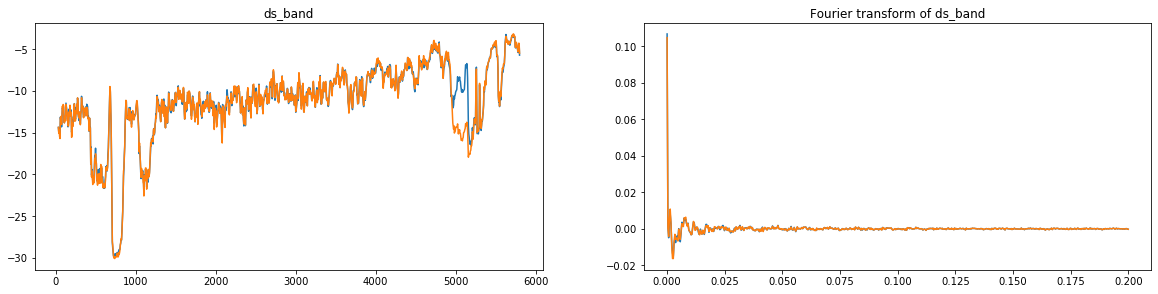

In [6]:
im1.plot_TF(im3)

/home/wilhelm/anaconda3/envs/ox/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/wilhelm/anaconda3/envs/ox/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


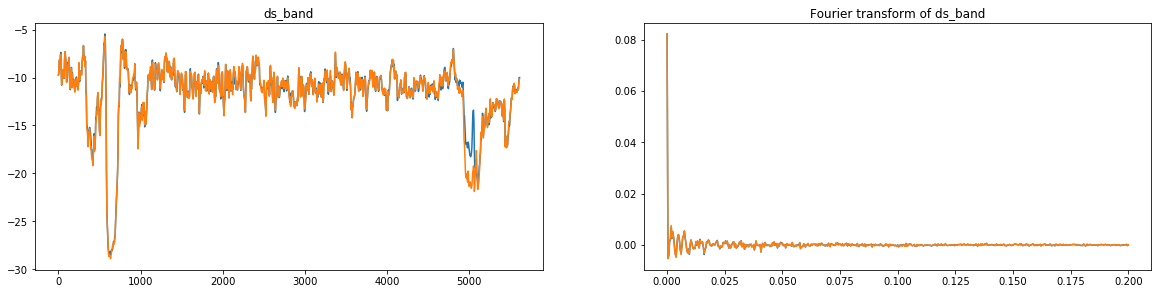

In [7]:
im_norm1.plot_TF(im_norm3)

# Spectrogram

In [8]:
help(im1.spectrogram)
help(im1.cross_spectro)

Help on method spectrogram in module lib:

spectrogram(name_win='tukey', n_win=None, plot=True, multiplier=None, vmax=None, subplot=False) method of lib.temp_lib instance
    Plots the spectrogram of ds_band using the windowed Fourier transform, eventually returns spectrogram as well.
    Z is multiplied by self._multiplier to ensure values > 1
    Parameters:
    TODO

Help on method cross_spectro in module lib:

cross_spectro(other, vmax=None) method of lib.temp_lib instance
    Calculates either the product or the difference between the computed spectrograms of two ds_bands (signals)
    Assuming that the spectrograms are computed
    Z is multiplied by self._multiplier to ensure values > 1



### Original bands



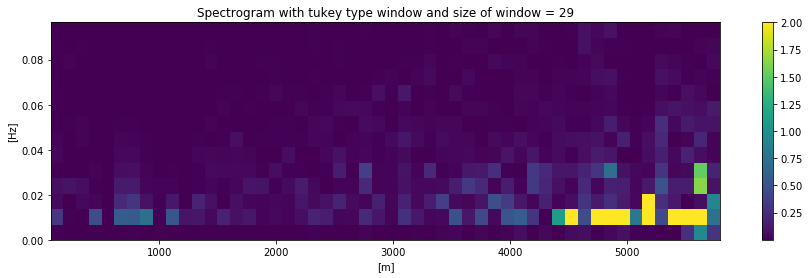

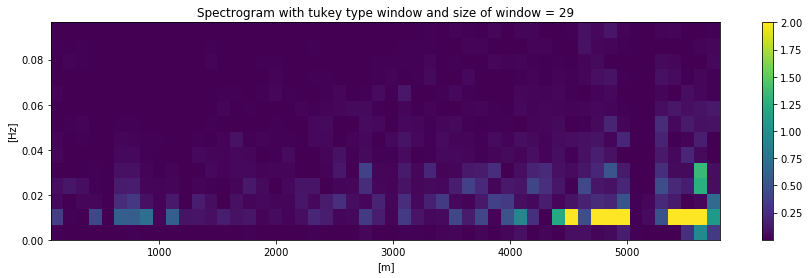

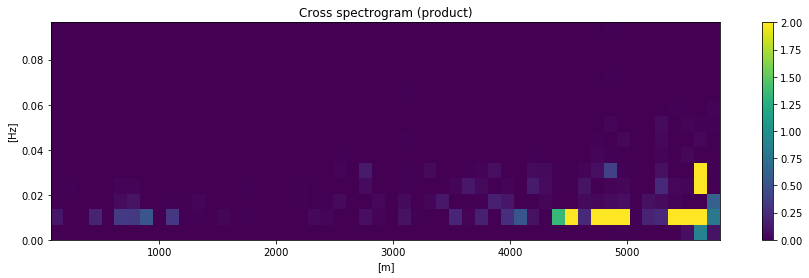

In [34]:
n_win = (len(im1._ds_band)//(40))
m  = 10
im1.spectrogram(name_win = "tukey", n_win = n_win, multiplier = m, vmax = m // 5)
im3.spectrogram(name_win = "tukey", n_win = n_win, multiplier = m, vmax = m // 5)
im1.cross_spectro(im3)

### Normalized bands

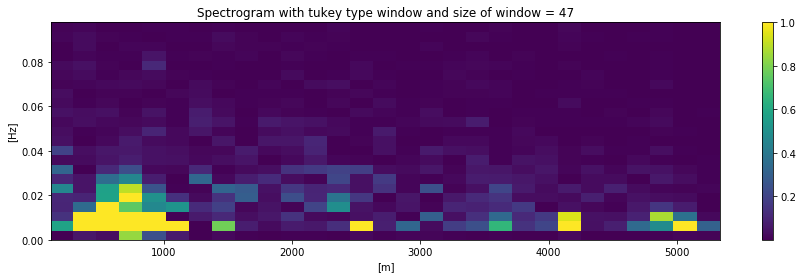

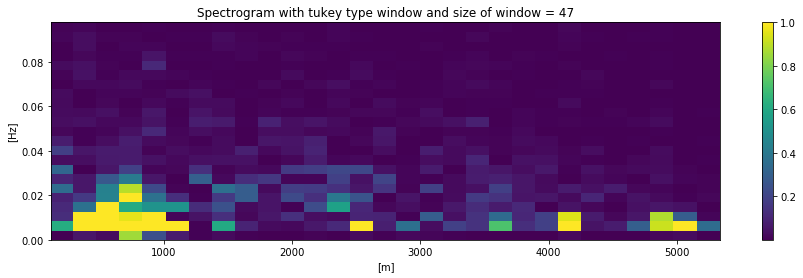

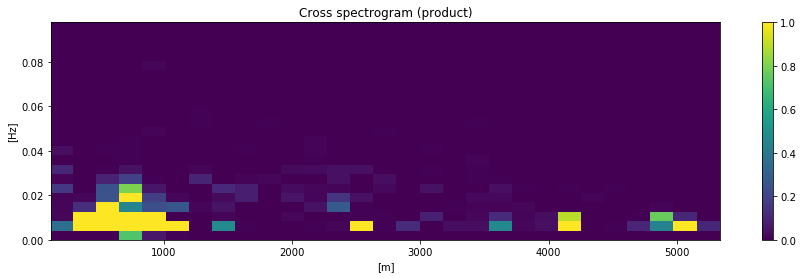

In [10]:
n_win = (len(im1._ds_band)//(25))

im_norm1.spectrogram(n_win = n_win, multiplier = m, vmax = m // 10)
im_norm3.spectrogram(n_win = n_win, multiplier = m, vmax = m // 10)
im_norm1.cross_spectro(im_norm3, vmax = m //10)

# CWT and XWT

In [11]:
help(im1.cwt)
help(im1.xwt)

Help on method cwt in module lib:

cwt(w=None, multiplier=None, plot=True, vmax=None) method of lib.temp_lib instance
    Computes the CWT of self._ds_band and plots the corresponding spectrogram
    the cwt is multiplied by self._multiplier to ensure values > 1

Help on method xwt in module lib:

xwt(other, w=10, vmax=None) method of lib.temp_lib instance
    Calculates and plots the cross wavelet transform of self._ds_band and other._ds_band



### Original data


In [12]:
im1 = temp_lib(ds_band1)
im3 = temp_lib(ds_band3)

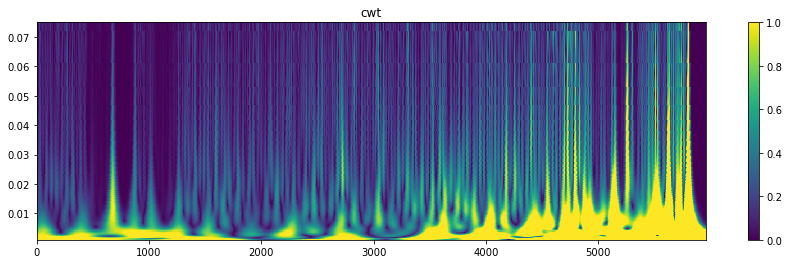

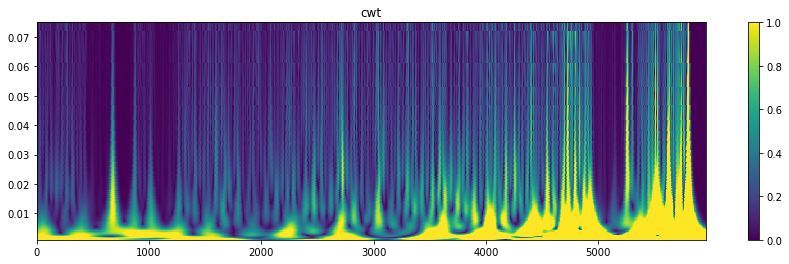

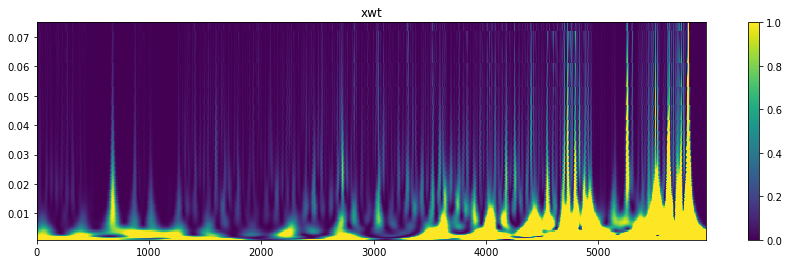

In [13]:
w = 6
m = 10
vmax = 1
im1.cwt(w = w, multiplier = m, vmax = vmax)
im3.cwt(w = w, multiplier = m, vmax = vmax)
im1.xwt(im3, vmax = vmax)

### Normalized data

In [14]:
im_norm1 = temp_lib(ds_norm1)
im_norm3 = temp_lib(ds_norm3)

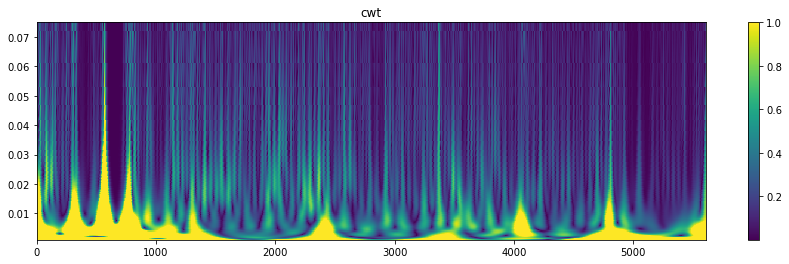

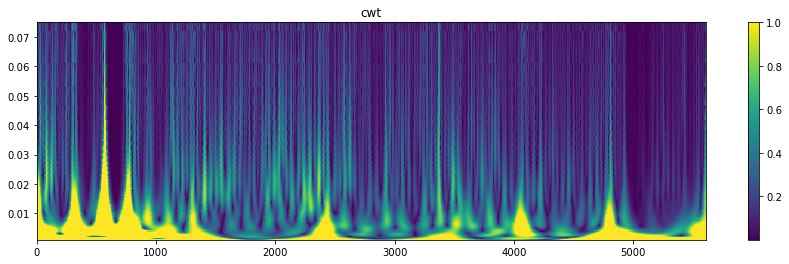

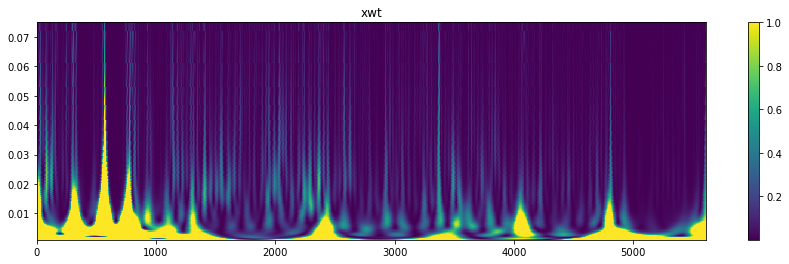

In [15]:
w = 6
m = 10
vmax = 1
im_norm1.cwt(w = w, multiplier = m, vmax = vmax)
im_norm3.cwt(w = w, multiplier = m, vmax = vmax)
im_norm1.xwt(im_norm3, vmax = vmax)

doesn't really detect the deforestation around 5km (other than the small amount of biomass)

### Decrease resolution

In [16]:
help(im1.decrease_resolution)

Help on method decrease_resolution in module lib:

decrease_resolution(n, other=False) method of lib.temp_lib instance
    Decreases the resolution using numpy.convolve and updates ds_band
    Reset by calling extract_band



/home/wilhelm/INSA/4A/S2/CESBIO/lib.py:93: RuntimeWarning: divide by zero encountered in log10
  plt.plot(self._x, np.log10(self._ds_band)*10)
/home/wilhelm/anaconda3/envs/ox/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


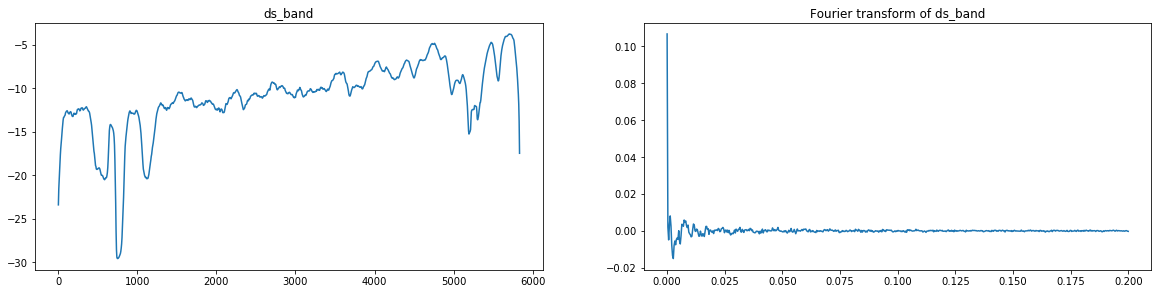

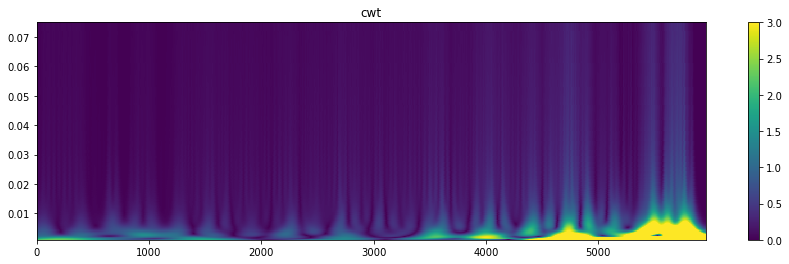

In [17]:
im1.decrease_resolution(n = 15)
im1.plot_TF()
im1.cwt(vmax = 3)

### Simulated deforestation / Etude de sensibilite


In [18]:
help(temp_lib.simulate_deforestation)

Help on function simulate_deforestation in module lib:

simulate_deforestation(self, location, mu=None, sigma=None, plot=True, n=None)
    simulates deforestation
    location: where the deforestation should take place



/home/wilhelm/INSA/4A/S2/CESBIO/lib.py:237: RuntimeWarning: divide by zero encountered in log10
  plt.plot(self._x, np.log10(self._ds_band)*10)
/home/wilhelm/INSA/4A/S2/CESBIO/lib.py:238: RuntimeWarning: divide by zero encountered in log10
  plt.plot(self._x, np.log10(self._deforestated_band)*10)


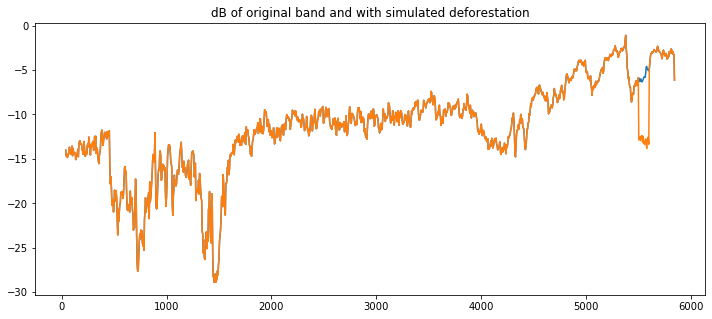

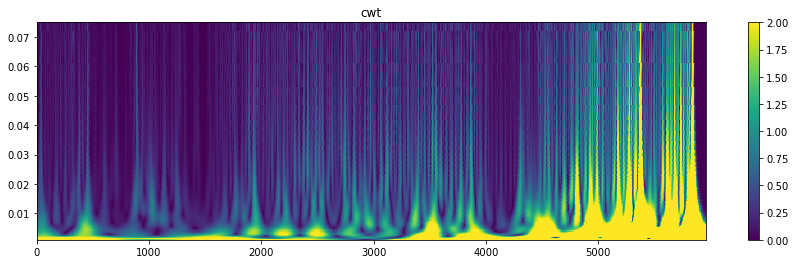

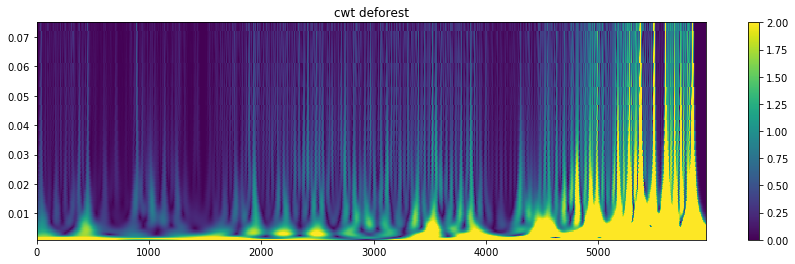

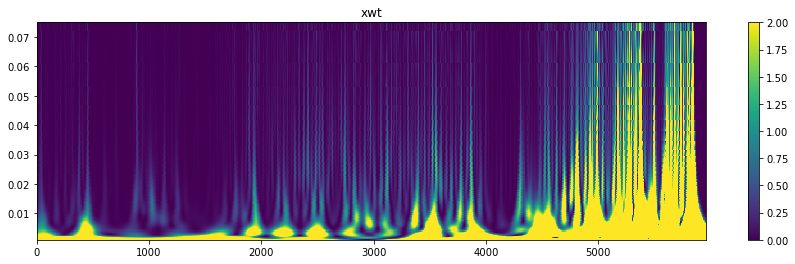

In [53]:
im1 = temp_lib(ds_band1)
im1._multiplier = 20
im1.extract_band([500, 525])

sig = np.var(im1._ds_band)
taille_pixel = im1._s # 5
n_pixel = 20
x = 5500  # 5600
location = [x, int(taille_pixel * n_pixel + x)]
im1.simulate_deforestation(location, mu = 0.05, sigma= sig / 4)

/home/wilhelm/INSA/4A/S2/CESBIO/lib.py:237: RuntimeWarning: divide by zero encountered in log10
  plt.plot(self._x, np.log10(self._ds_band)*10)
/home/wilhelm/INSA/4A/S2/CESBIO/lib.py:238: RuntimeWarning: divide by zero encountered in log10
  plt.plot(self._x, np.log10(self._deforestated_band)*10)


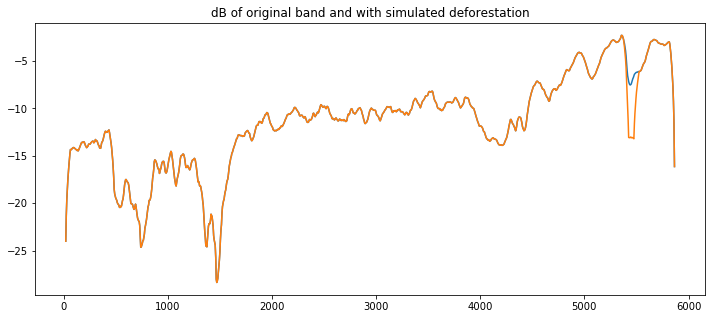

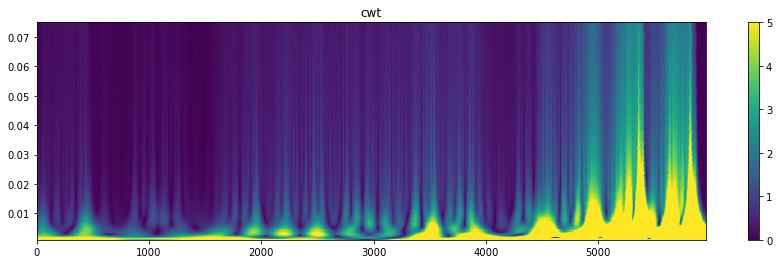

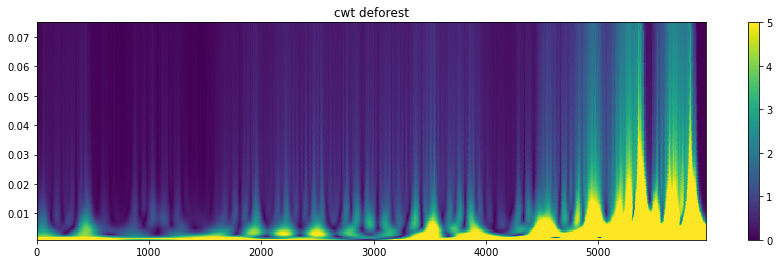

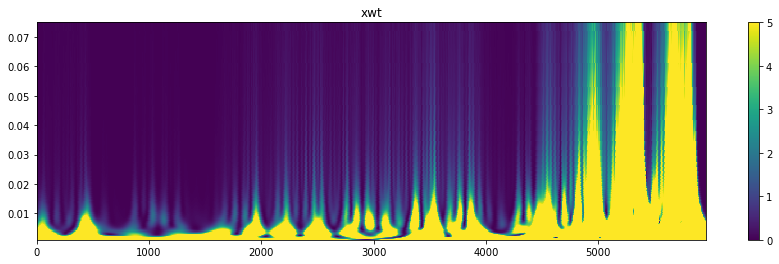

In [54]:
im1 = temp_lib(ds_band1)
im1._multiplier = 50
im1.extract_band([500, 525])
sig = np.var(im1._ds_band)
taille_pixel = im1._s # 5
n_pixel = 20
x = 5400 # 5400, 5600
location = [x, int(taille_pixel * n_pixel + x)]
im1.simulate_deforestation(location, mu = 0.05, sigma= sig / 4, n = 10) # n = 5 ,10

### Psd / welch


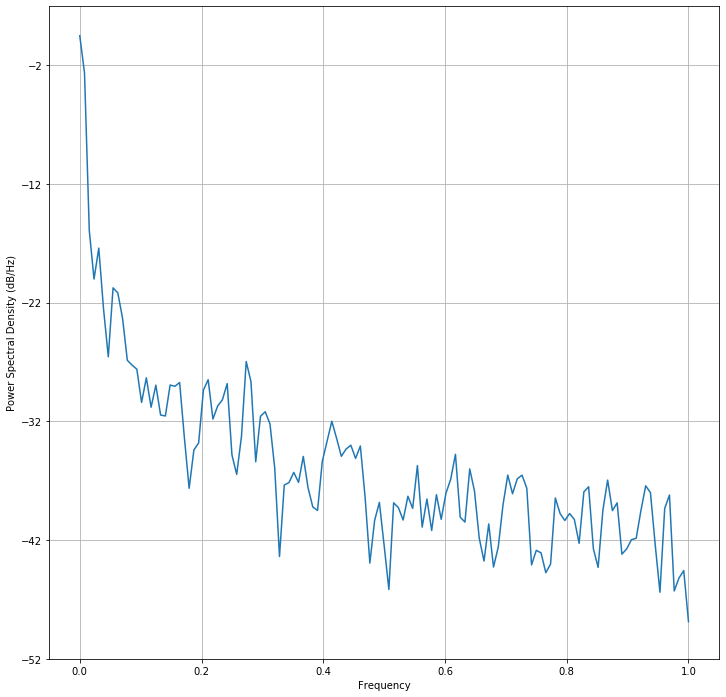

In [21]:
plt.figure(figsize = (12,12))
im1 = temp_lib(ds_band1)


plt.psd(im1._ds_band)
plt.show()


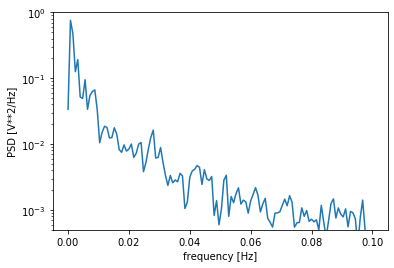

0.0008


In [32]:
im1 = temp_lib(ds_band1)
f, Pxx_den = ss.welch(im1._ds_band, im1._fs, nperseg=250)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()
print(f[np.argmax(Pxx_den)])